<a href="https://colab.research.google.com/github/daniellorieri/Data_Science_E_Analise_de_Dados/blob/main/Census_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objetivo
######Analisar e comparar algumas variáveis do conjunto de dados do arquvio census.csv e exibir em gráfics para melhor visualização e auxiliar para extrair algumas idéias.

###Dados 
#####Obtidos do curso realizado na UDEMY de Estatística para Ciência de Dados e Machine Learning.

###Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

###Lendo o Conjunto de Dados

In [109]:
#carregamento da base de dados Census.csv
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/dataset/census.csv')

###Dicionário de varáveis do dataset

- age: idade
- workclass: classe de trabalho
- final-weight: peso final
- education: Educação
- education-num: educação-num
- marital-status: Estado civil	
- occupation:	ocupação
- relationship	
- race: relacionamento corrida
- sex	
- capital-gain: ganho de capital 	
- capital-loos: perda capital
- hour-per-week: hora por semana
- native-country: país nativo
- income: renda por ano



In [4]:
#Exbindo as primeiras 5 linhas do dataset
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###Exibindo o total de linhas e colunas do dataset

In [45]:
print(f'Numero de linhas: {len(data.index)}')
print(f'Numero total de colunas: {len(data.columns)}')

Numero de linhas: 32561
Numero total de colunas: 15


###Exibindo as variáveis presente do conjunto de dados

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#Excluindo valores nulos
dataset.dropna(inplace=True)

In [110]:
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


####Corrigindo o nome das colunas para garantir que seja precisos na hora em que for usar.

In [111]:
#corrigindo 
data.columns = data.columns.str.replace('-', '_')

#visalizando novamente
data.head(10)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loos,hour_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [115]:
data.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loos,hour_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


####Exibir algumas medidas descritivas das variáveis, como média, mediana(quartil 50%), máxima, mínima, desvio padrão, quartis e contagem.

In [47]:
data.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
As pessoas dessa pesquisa tem em média 39 anos, onde idade mínima é 17 anos e máxima 90 anos.
Uma média de 40 horas trabalhadas na semana.

####Distribuir as varáveis usando histograma.

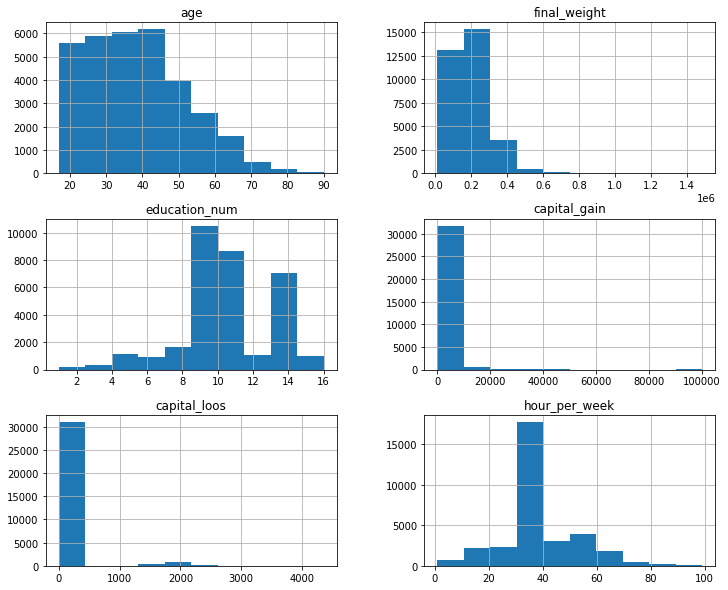

In [94]:
data.hist(figsize=(12,10));

######É notável que a maior concentração de pessoas desse dataset está entre 20 a 50 anos. Nota-se no gráfico que a média é de 40 horas trabalhadas na semana. 

####Variáveis Categóricas

######Analisando a variável sexo  e horas trabalahadas na semana, em média a mulher trabalha 36 horas na semana, e os homens 42 horas na semana.

In [ ]:
df_plot = data.groupby('sex'). hour_per_week.mean(). reset_index()
df_plot


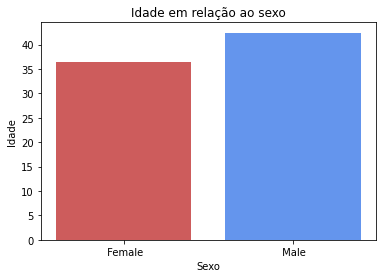

In [98]:
#Definindo palte de cores para o gráfico
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]
######
x=df_plot['sex']
y=df_plot['hour_per_week']
plt.bar(x,y,color=cols);
plt.title('Idade em relação ao sexo');
plt.xlabel('Sexo');
plt.ylabel('Idade');

####Total de pessoas por graduação

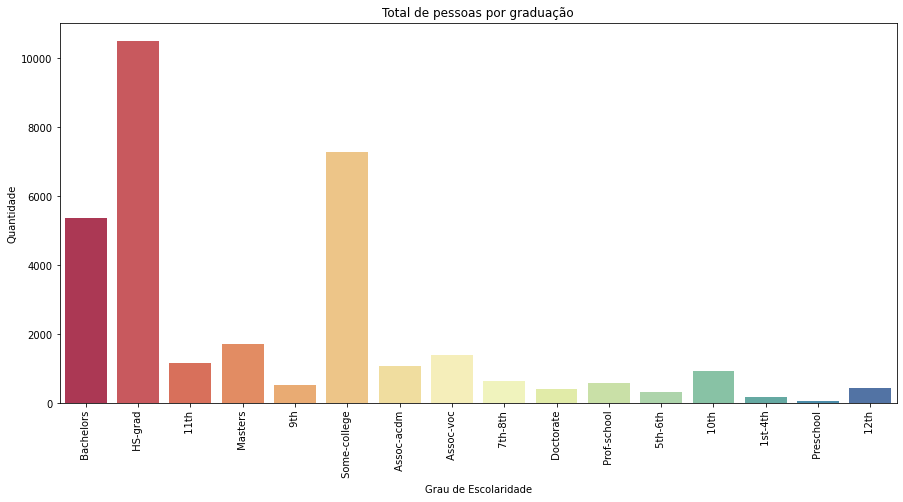

In [ ]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=data.education, palette="Spectral")
plt.xlabel('Grau de Escolaridade')
plt.ylabel('Nº de Pessoas')
plt.title('Total de pessoas por graduação')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show(fig)

#####A maior parte das pessoas possuem High-Graduate(2º garau completo).

###Qual a quantidade de pessoas divididas por sexo?

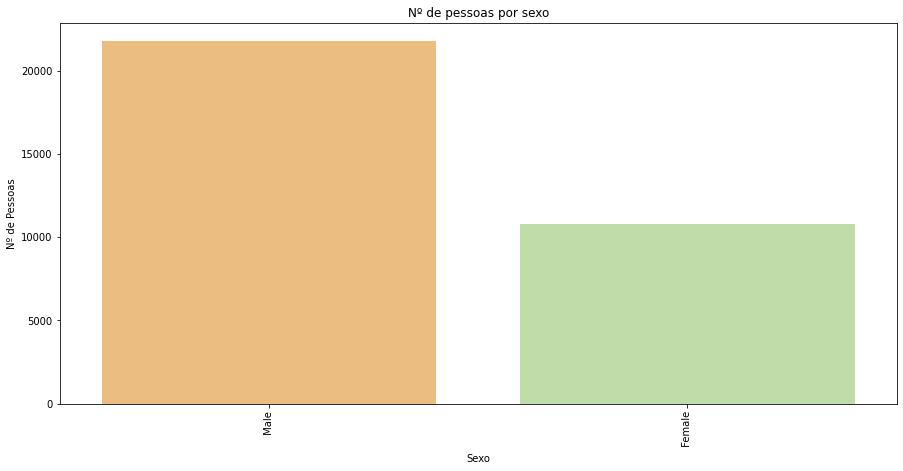

In [ ]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=data.sex, palette="Spectral")
plt.xlabel('Sexo')
plt.ylabel('Nº de Pessoas')
plt.title('Nº de pessoas por sexo')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show(fig)

#####Maior quantidade é do sexo masculino.



####Agrupando dados da variável sexo para saber a quantidade. Exibindo porcentagem por sexo.

In [ ]:
data.groupby(by='sex').size()

sex
 Female    10771
 Male      21790
dtype: int64

In [ ]:
#Porcentagem do sexo Feminino
1077/data['sex'].count()

0.03307637971806763

In [ ]:
#Porcentagem do sexo Masculino
21790/data['sex'].count()

0.6692054912318418

###Qual a ocupação mais frequente?

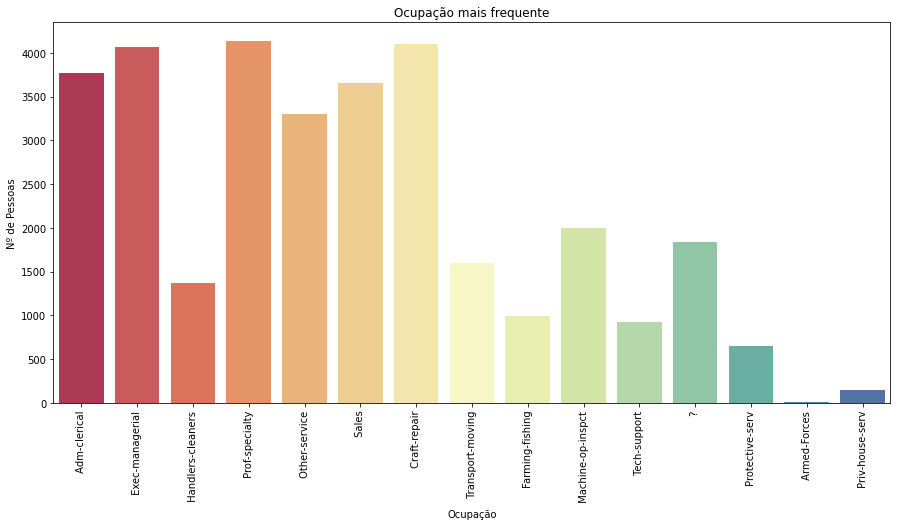

In [ ]:
plt.figure(figsize=(15,7))
fig = sns.countplot(x=data.occupation, palette="Spectral")
plt.xlabel('Ocupação')
plt.ylabel('Nº de Pessoas')
plt.title('Ocupação mais frequente')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show(fig)

In [ ]:
data.groupby(by='occupation').size()

occupation
 ?                    1843
 Adm-clerical         3770
 Armed-Forces            9
 Craft-repair         4099
 Exec-managerial      4066
 Farming-fishing       994
 Handlers-cleaners    1370
 Machine-op-inspct    2002
 Other-service        3295
 Priv-house-serv       149
 Prof-specialty       4140
 Protective-serv       649
 Sales                3650
 Tech-support          928
 Transport-moving     1597
dtype: int64

####Mais frequentes são Prof-specialty, Craft-repair e Exec-managerial

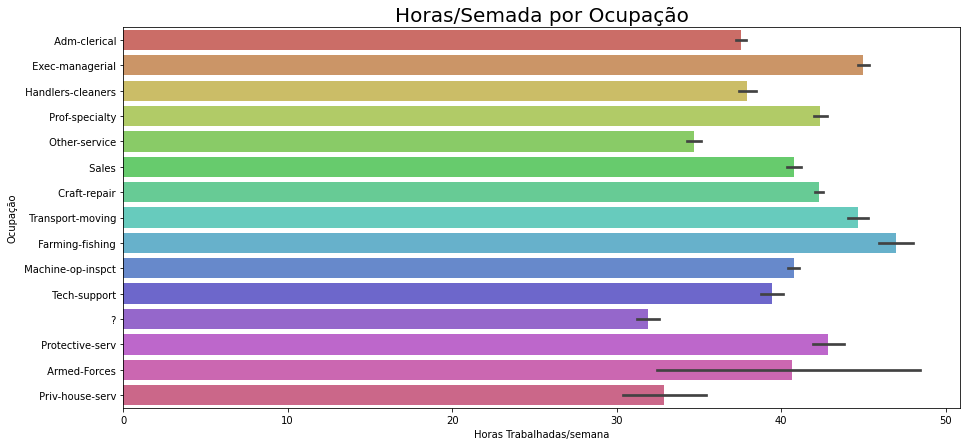

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.barplot(y='occupation',x='hour-per-week',data=data,palette="hls")
#sns.color_palette("mako", as_cmap=True)
plt.xlabel('Horas Trabalhadas/semana')
plt.ylabel('Ocupação')
plt.title('Horas/Semada por Ocupação', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

####Agricultura e pesca são as profissões com horas mais trabalhadas na semana.

###Nuvem de Palavras com a representação das ocupações.

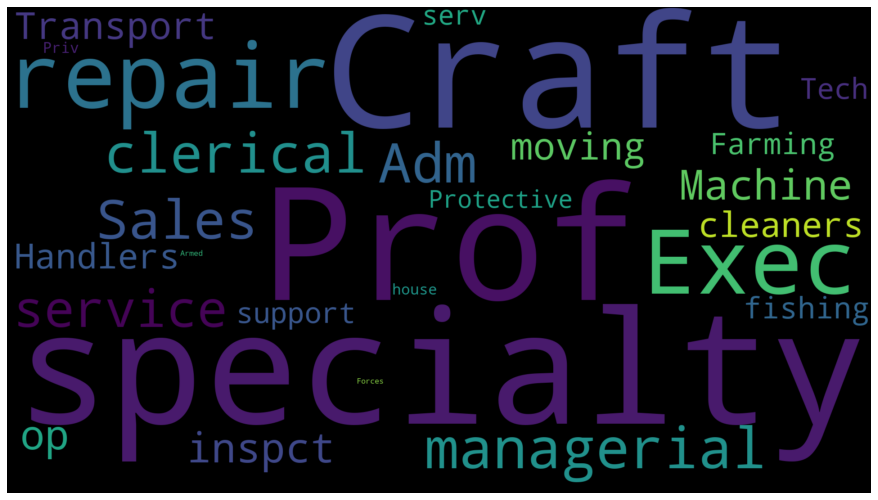

In [ ]:
wordcloud = WordCloud(max_font_size=350, collocations=False,width=1920, height=1080, background_color="black").generate(' '.join(data.occupation))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()